<a href="https://colab.research.google.com/github/techmoksha/iisc-cds-modules/blob/module-1/M2_NB_MiniProject_1_LinearRegression_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Linear Regression with Regularization

## Problem Statement

Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season e.t.c.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration and visualization
* implement linear regression using sklearn and optimization
* apply regularization on regression using Lasso, Ridge and Elasticnet techniques
* calculate and compare the MSE value of each regression technique
* analyze the features that are best contributing to the target

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of 16 features.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1:winter, 2:spring, 3:summer, 4:fall
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).

 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

Below are the Regularization techniques:

 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

## Grading = 10 Points

In [1]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
!unzip Bike_Sharing_Dataset.zip

Archive:  Bike_Sharing_Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


#### Importing Necessary Packages

In [34]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Data Loading

In [3]:
# Read the hour.csv file
# YOUR CODE HERE
df = pd.read_csv('hour.csv')
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


print the first five rows of dataset

In [4]:
# YOUR CODE HERE
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


print the datatypes of the columns

In [5]:
# YOUR CODE HERE
df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


In [4]:
df['hr'].unique().shape[0]

24

### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization ( 2 points)

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

In [5]:
count_grouped_by_hour = df.groupby('hr')['cnt'].sum().reset_index()
count_grouped_by_hour

,hr,cnt
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


In [ ]:
plt.hist?

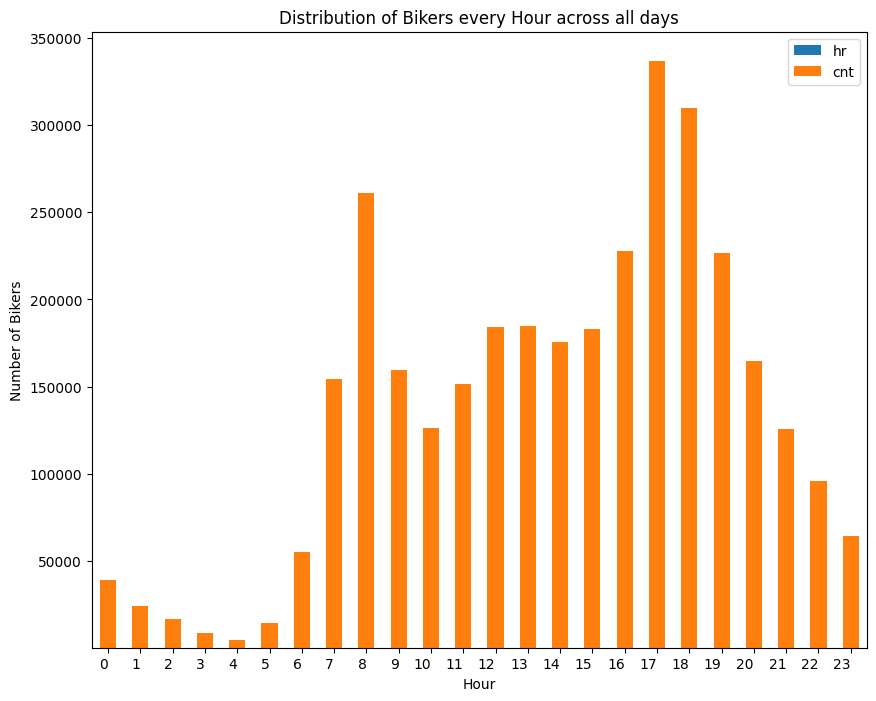

In [7]:
count_grouped_by_hour.plot(kind="bar",stacked=True, figsize=(10, 8))

plt.xlabel("Hour")
plt.ylabel("Number of Bikers")
plt.title("Distribution of Bikers every Hour across all days")
plt.xticks(rotation=0, ha='right')
plt.spring()
plt.show()

It appears that morning 8 AM and evening 5, 6 PM are busiest


#### Visualize the distribution of count, casual and registered variables

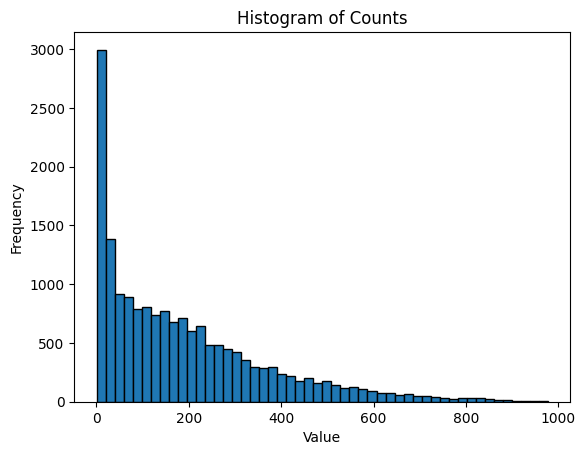

In [8]:
# YOUR CODE HERE for distribuiton of count variable
plt.hist(df['cnt'], bins=50, edgecolor='black')

# Add labels and title
plt.title('Histogram of Counts')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

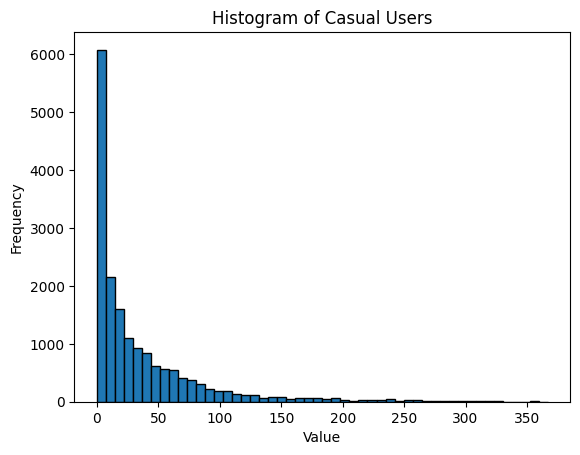

In [9]:
# YOUR CODE HERE for distribuiton of casual variable
plt.hist(df['casual'], bins=50, edgecolor='black')

# Add labels and title
plt.title('Histogram of Casual Users')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

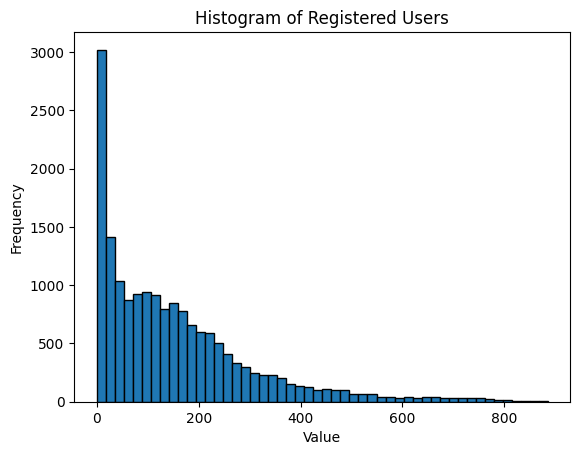

In [10]:
# YOUR CODE HERE for distribuiton of registered variable
plt.hist(df['registered'], bins=50, edgecolor='black')

# Add labels and title
plt.title('Histogram of Registered Users')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

#### Describe the relation of weekday, holiday and working day

In [11]:
df.sample(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16042,16043,2012-11-06,4,1,11,3,0,2,1,1,0.22,0.2424,0.64,0.1045,0,4,4
14365,14366,2012-08-26,3,1,8,18,0,0,0,2,0.64,0.5758,0.89,0.0896,77,187,264
8459,8460,2011-12-24,1,0,12,3,0,6,0,2,0.32,0.3333,0.70,0.0896,0,5,5
8783,8784,2012-01-06,1,1,1,19,0,5,1,1,0.46,0.4545,0.33,0.2836,11,261,272
8417,8418,2011-12-22,1,0,12,9,0,4,1,2,0.38,0.3939,0.87,0.0896,10,218,228
4199,4200,2011-06-28,3,0,6,21,0,2,1,1,0.74,0.6970,0.66,0.2836,31,164,195
17220,17221,2012-12-25,1,1,12,9,1,2,0,2,0.24,0.2576,0.87,0.0000,7,21,28
9822,9823,2012-02-19,1,1,2,5,0,0,0,2,0.26,0.2273,0.48,0.2985,1,1,2
258,259,2011-01-12,1,0,1,5,0,3,1,1,0.14,0.1515,0.86,0.1642,0,5,5
7801,7802,2011-11-26,4,0,11,16,0,6,0,2,0.46,0.4545,0.47,0.1343,137,138,275


In [11]:
# YOUR CODE HERE
correlation_matrix = df[['weekday', 'holiday', 'workingday']].corr(method='pearson')
correlation_matrix

,weekday,holiday,workingday
weekday,1.000000,-0.102088,0.035955
holiday,-0.102088,1.000000,-0.252471
workingday,0.035955,-0.252471,1.000000


In [12]:
spearman_corr = df['holiday'].corr(df['workingday'], method='spearman')
spearman_corr

-0.25247136958183763

#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

In [13]:
# stacked bar chart for year 2011
# YOUR CODE HERE
casual_registered_per_year = df.groupby(['yr', 'mnth']).agg(
    total_casual=('casual', 'sum'),
    total_registered=('registered', 'sum')
).reset_index()
casual_registered_per_year

,yr,mnth,total_casual,total_registered
0,0,1,3073,35116
1,0,2,6242,41973
2,0,3,12826,51219
3,0,4,22346,72524
4,0,5,31050,104771
5,0,6,30612,112900
6,0,7,36452,104889
7,0,8,28842,107849
8,0,9,26545,100873
9,0,10,25222,98289


In [14]:
months = ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12')

In [15]:
def stacked_bar_plot(yr: int, casual_users, registered_users):
    ind = np.arange(12)    # the 12 months
    width = 0.4
    p1 = plt.bar(ind, casual_users, width)
    p2 = plt.bar(ind, registered_users, width,
                bottom=casual_users)
    plt.xlabel(f"Months of {yr}")
    plt.ylabel("Number of Users")
    plt.title(f"Distribution of Casual and Registered Users across 12 months of {yr}")
    plt.xticks(ind, months, rotation=90, ha='right')
    plt.legend((p1[0], p2[0]), ('Casual', 'Registered'))
    plt.spring()
    plt.show()

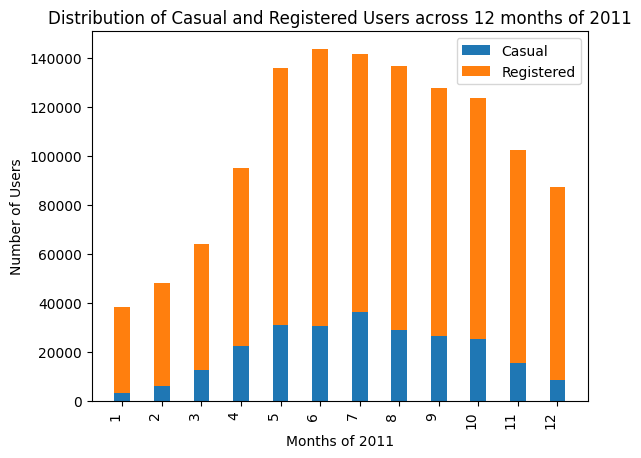

In [16]:
total_casual_yr_2011 = casual_registered_per_year.query('yr == 0')['total_casual']
total_registered_yr_2011 = casual_registered_per_year.query('yr == 0')['total_registered']
stacked_bar_plot('2011', total_casual_yr_2011, total_registered_yr_2011)

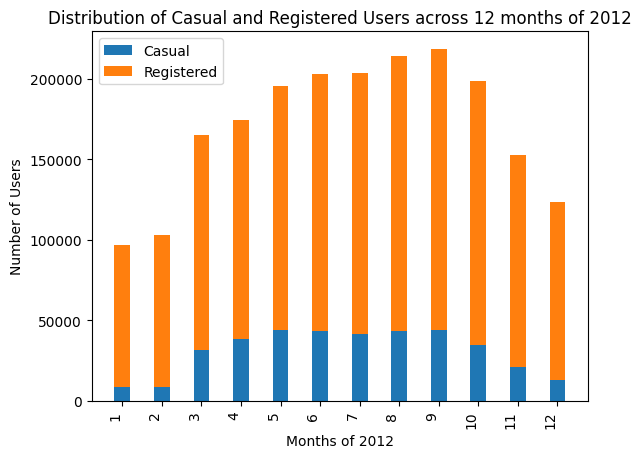

In [17]:
# stacked bar chart for year 2012
# YOUR CODE HERE
total_casual_yr_2012 = casual_registered_per_year.query('yr == 1')['total_casual']
total_registered_yr_2012 = casual_registered_per_year.query('yr == 1')['total_registered']
stacked_bar_plot('2012', total_casual_yr_2012, total_registered_yr_2012)

#### Analyze the correlation between features with heatmap

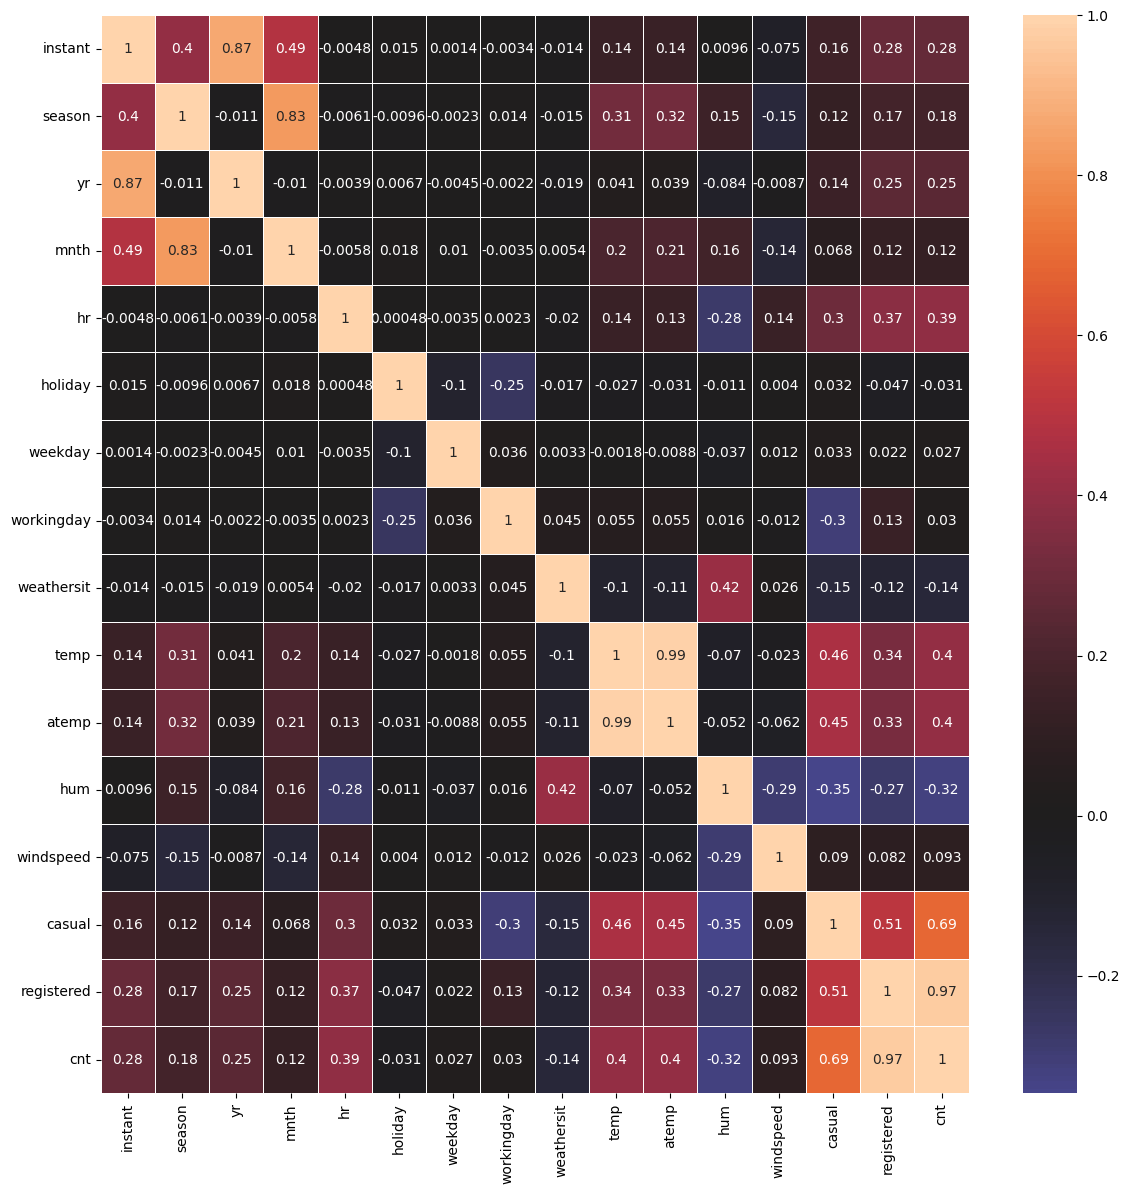

In [7]:
# YOUR CODE HERE
df_new = df.drop('dteday', axis=1)
df_new = df_new.apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(14, 14))
sns.heatmap(df_new.corr(), annot=True, linewidth=0.5, center=0)
plt.show()

It appears that temp and atemp have high correlation. Similarly season and month have high correlations too.

#### Visualize the box plot of casual and registered variables to check the outliers

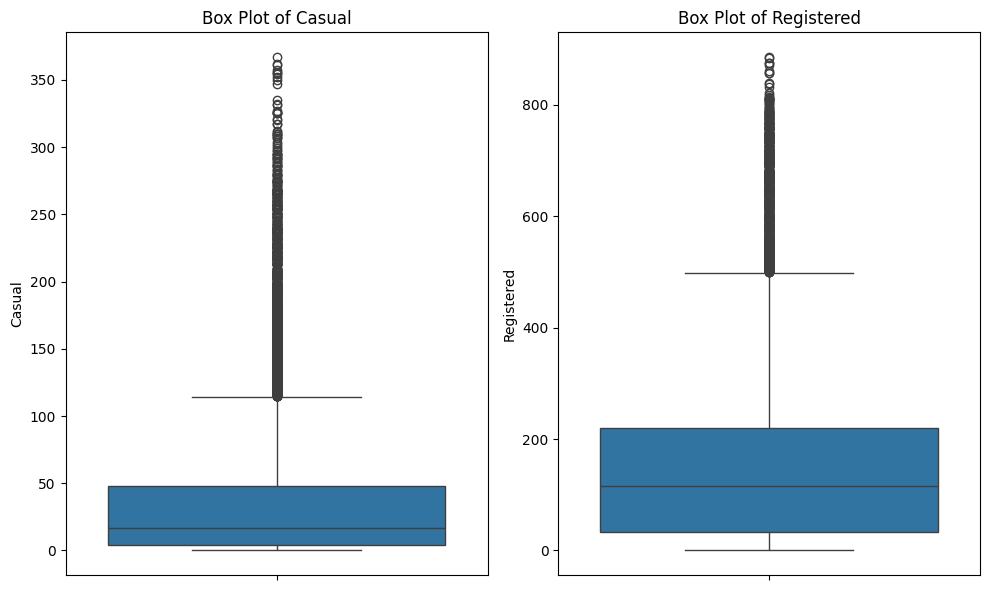

In [19]:
# YOUR CODE HERE
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Box plot for 'casual'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(y=df_new['casual'])
plt.title('Box Plot of Casual')
plt.ylabel('Casual')

# Box plot for 'registered'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(y=df_new['registered'])
plt.title('Box Plot of Registered')
plt.ylabel('Registered')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

**Casual Median** : 20
**Casual Max** : 120

**Registered Median** : 120
**Registered Max** : ~500

Value spread higher for Registered, whereas Outlier Spread higher for casual.


### Pre-processing and Data Engineering (1 point)

#### Drop unwanted columns

In [8]:
# YOUR CODE HERE
# Dropping atemp and windspeed as they do not seem to have any impact on bike sharing
df_new = df_new.drop(['atemp', 'windspeed'], axis=1)
df_new

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.81,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.80,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.80,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.75,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.75,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,1,12,19,0,1,1,2,0.26,0.60,11,108,119
17375,17376,1,1,12,20,0,1,1,2,0.26,0.60,8,81,89
17376,17377,1,1,12,21,0,1,1,1,0.26,0.60,7,83,90
17377,17378,1,1,12,22,0,1,1,1,0.26,0.56,13,48,61


#### Identify categorical and continuous variables


In [9]:
# YOUR CODE HERE
max_unique_for_categorical = 24

categorical_columns = []
continuous_columns = []

[categorical_columns.append(col) if df_new[col].dtype == 'object' or  df[col].nunique() <= max_unique_for_categorical else continuous_columns.append(col) for col in df_new.columns]

print("Categorical variables:", categorical_columns)
print("Continuous variables:", continuous_columns)

Categorical variables: ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
Continuous variables: ['instant', 'temp', 'hum', 'casual', 'registered', 'cnt']


#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



In [10]:
# YOUR CODE HERE
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_new[continuous_columns]), columns=continuous_columns)
df_scaled

,instant,temp,hum,casual,registered,cnt
0,-1.731951,-1.334648,0.947372,-0.662755,-0.930189,-0.956339
1,-1.731752,-1.438516,0.895539,-0.561343,-0.804655,-0.824022
2,-1.731552,-1.438516,0.895539,-0.622190,-0.837690,-0.868128
3,-1.731353,-1.334648,0.636370,-0.662755,-0.950010,-0.972879
4,-1.731154,-1.334648,0.636370,-0.723603,-1.009474,-1.039037
...,...,...,...,...,...,...
17374,1.731154,-1.230779,-0.141137,-0.500495,-0.302517,-0.388478
17375,1.731353,-1.230779,-0.141137,-0.561343,-0.480908,-0.553875
17376,1.731552,-1.230779,-0.141137,-0.581625,-0.467694,-0.548361
17377,1.731752,-1.230779,-0.348473,-0.459930,-0.698942,-0.708245


#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [11]:
# YOUR CODE HERE
encoder = OneHotEncoder(sparse_output=False)

df_one_hot_encoded = encoder.fit_transform(df_new[categorical_columns])

# Convert the array to a DataFrame and add column names
df_encoded = pd.DataFrame(df_one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
# Combine categorical and continuous
df_encoded = pd.concat([df_scaled, df_encoded], axis=1)

print(f"Encoded Employee data : \n{df_encoded}")

Encoded Employee data : 
        instant      temp       hum    casual  registered       cnt  season_1  \
0     -1.731951 -1.334648  0.947372 -0.662755   -0.930189 -0.956339       1.0   
1     -1.731752 -1.438516  0.895539 -0.561343   -0.804655 -0.824022       1.0   
2     -1.731552 -1.438516  0.895539 -0.622190   -0.837690 -0.868128       1.0   
3     -1.731353 -1.334648  0.636370 -0.662755   -0.950010 -0.972879       1.0   
4     -1.731154 -1.334648  0.636370 -0.723603   -1.009474 -1.039037       1.0   
...         ...       ...       ...       ...         ...       ...       ...   
17374  1.731154 -1.230779 -0.141137 -0.500495   -0.302517 -0.388478       1.0   
17375  1.731353 -1.230779 -0.141137 -0.561343   -0.480908 -0.553875       1.0   
17376  1.731552 -1.230779 -0.141137 -0.581625   -0.467694 -0.548361       1.0   
17377  1.731752 -1.230779 -0.348473 -0.459930   -0.698942 -0.708245       1.0   
17378  1.731951 -1.230779  0.118032 -0.480213   -0.771619 -0.774403       1.0   

  

In [ ]:
encoder.get_feature_names_out?

In [24]:
df_encoded.columns

Index(['instant', 'temp', 'hum', 'casual', 'registered', 'cnt', 'season_1',
       'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23', 'holiday_0', 'holiday_1', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_0', 'workingday_1', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')

#### Specify features and targets after applying scaling and one-hot encoding

In [12]:
from sklearn.impute import SimpleImputer
# YOUR CODE HERE
pred_features_columns = ['hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23', 'holiday_0', 'holiday_1', 'hum', 'temp', 'season_1', 'season_2','season_3','season_4','workingday_0','workingday_1','weathersit_1','weathersit_2','weathersit_3','weathersit_4','weekday_0','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6']

X = df_encoded[pred_features_columns]
# Imputing missing values in X
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
X = pd.DataFrame(X, columns=pred_features_columns)
# Target features is total count, casual and registered users of bikes
y = df_encoded[['cnt', 'casual', 'registered']]
# YOUR CODE HERE to show 'X'
X

,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,...,weathersit_2,weathersit_3,weathersit_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
print(f"Number of features selected for prediction {len(pred_features_columns)}")

Number of features selected for prediction 45


### Implement the linear regression by finding the coefficients using below approaches (2 points)

* Find the coefficients using normal equation

* (Optional) Implement batch gradient descent

* (Optional) SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

In [14]:
# YOUR CODE HERE
y = df_encoded['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 101)

In [15]:
y_train.head()

,cnt
11565,-0.956339
2470,-0.267187
14836,0.840969
12275,1.640385
6884,-0.223082


#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

For performing Linear Regression Using the Normal Equation refer [here](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Performing%20Linear%20Regression%20using%20Normal%20equation.pdf).

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [ ]:
# YOUR CODE HERE
X = np.array(X_train)
Y = np.array(y_train)
# Using least squares on training data set.
theta_vec, residuals, rank, s = np.linalg.lstsq(X, Y, rcond=None)

In [30]:
feature_to_coefficients = {X_train.columns[i]:theta_vec[i] for i in range(len(X_train.columns))}
feature_to_coefficients

{'hr_0': -0.6748159521722419,
 'hr_1': -0.7457814001732459,
 'hr_2': -0.8004828384257926,
 'hr_3': -0.8586820361951801,
 'hr_4': -0.8634471367488639,
 'hr_5': -0.7871295989729075,
 'hr_6': -0.45561855348227726,
 'hr_7': 0.2946900432156075,
 'hr_8': 1.035756569624836,
 'hr_9': 0.2166407146161045,
 'hr_10': -0.10608494344628423,
 'hr_11': 0.023604407553394335,
 'hr_12': 0.2526219478898465,
 'hr_13': 0.21806332349052712,
 'hr_14': 0.114612620832402,
 'hr_15': 0.16732611661445074,
 'hr_16': 0.520507408492408,
 'hr_17': 1.3778128905381528,
 'hr_18': 1.1559059629968156,
 'hr_19': 0.6275430900594449,
 'hr_20': 0.16888567808417956,
 'hr_21': -0.08608739245976171,
 'hr_22': -0.28925849435566325,
 'hr_23': -0.49068852011490527,
 'holiday_0': 0.059116877401313384,
 'holiday_1': -0.04322296994027703,
 'hum': -0.09877479445490099,
 'temp': 0.2956818204538619,
 'season_1': -0.1494819155350547,
 'season_2': 0.04357025628168348,
 'season_3': -0.0697904882655978,
 'season_4': 0.19159605498000656,
 'wor

#### (Optional) Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.

Hint: [gradient descent](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Multivariate%20Linear%20Regression.pdf)

In [17]:
# YOUR CODE HERE
def cost_function(X, Y, theta):
    m = len(Y)
    J = np.sum((X.dot(theta) - Y) ** 2) / 2 * m
    return J

In [21]:
def batch_gradient_descent(X, Y, theta, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for iter in range(iterations):
        # Calculate hypothesis values
        h = X.dot(theta)
        # Difference between actual and calculated
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        theta -= alpha * gradient
        cost = cost_function(X, Y, theta)
        cost_history[iter] = cost
    return theta, cost_history


In [ ]:
errs_1 = []
theta = np.zeros(X_train.shape[1])         # initial guess
alpha = 0.05                               # learning rate
iterations = 2000

final_theta, cost_history = batch_gradient_descent(X_train, y_train, theta, alpha, iterations)
print(f"Theta values final {final_theta}")
print(f"Cost History {cost_history}")

#### (Optional) SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [32]:
from sklearn.linear_model import SGDRegressor
# YOUR CODE HERE
sgd = SGDRegressor(max_iter=2000, tol=1e-3, penalty='l2', random_state=42)

# Fit the model on the training data
sgd.fit(X_train, y_train)

# Make predictions on the test set
y_pred = sgd.predict(X_test)

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Intercept:", sgd.intercept_)

Mean Squared Error: 0.3751157961784416
Intercept: [-0.04891519]


In [33]:
sgd_features_to_coefficients = {X_train.columns[i]:theta_vec[i] for i in range(len(X_train.columns))}
sgd_features_to_coefficients

{'hr_0': -0.6748159521722419,
 'hr_1': -0.7457814001732459,
 'hr_2': -0.8004828384257926,
 'hr_3': -0.8586820361951801,
 'hr_4': -0.8634471367488639,
 'hr_5': -0.7871295989729075,
 'hr_6': -0.45561855348227726,
 'hr_7': 0.2946900432156075,
 'hr_8': 1.035756569624836,
 'hr_9': 0.2166407146161045,
 'hr_10': -0.10608494344628423,
 'hr_11': 0.023604407553394335,
 'hr_12': 0.2526219478898465,
 'hr_13': 0.21806332349052712,
 'hr_14': 0.114612620832402,
 'hr_15': 0.16732611661445074,
 'hr_16': 0.520507408492408,
 'hr_17': 1.3778128905381528,
 'hr_18': 1.1559059629968156,
 'hr_19': 0.6275430900594449,
 'hr_20': 0.16888567808417956,
 'hr_21': -0.08608739245976171,
 'hr_22': -0.28925849435566325,
 'hr_23': -0.49068852011490527,
 'holiday_0': 0.059116877401313384,
 'holiday_1': -0.04322296994027703,
 'hum': -0.09877479445490099,
 'temp': 0.2956818204538619,
 'season_1': -0.1494819155350547,
 'season_2': 0.04357025628168348,
 'season_3': -0.0697904882655978,
 'season_4': 0.19159605498000656,
 'wor

### Linear regression using sklearn (3 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [35]:
# YOUR CODE HERE
lr = LinearRegression()
# Fit lin reg model to train
lr.fit(X_train, y_train)

# Predict on test data
pred = lr.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.43955665219168877
Mean Squared Error: 0.37399087119528274
Mean Root Squared Error: 0.6115479304153377


#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

In [36]:
# YOUR CODE HERE
print('Coefficient of Determination:', r2_score(y_test, pred))

Coefficient of Determination: 0.624376037150993


In [42]:
lr.

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score.
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

In [43]:
df_coefficients = pd.DataFrame({'Features': X_train.columns, 'Coefficients': lr.coef_})
df_coefficients

,Features,Coefficients
0,hr_0,-0.675478
1,hr_1,-0.746444
2,hr_2,-0.801145
3,hr_3,-0.859344
4,hr_4,-0.864109
5,hr_5,-0.787792
6,hr_6,-0.456281
7,hr_7,0.294028
8,hr_8,1.035094
9,hr_9,0.215978


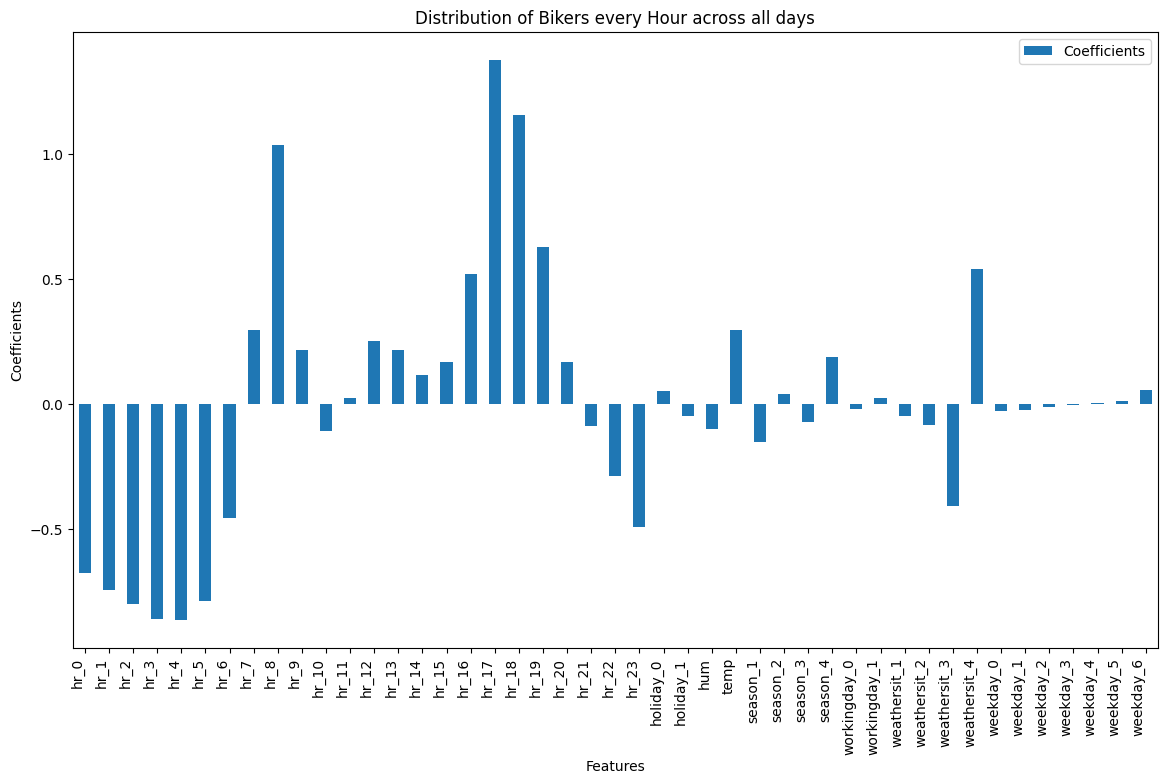

In [52]:
# YOUR CODE HERE
num_features = np.arange(df_coefficients.shape[0])
df_coefficients.plot(kind="bar",stacked=True, figsize=(14, 8))

plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("Distribution of Bikers every Hour across all days")
plt.xticks(num_features, df_coefficients['Features'], rotation=90, ha='right')
plt.spring()
plt.show()


### Regularization methods (2 points)

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [66]:
# setting up alpha
alphas = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]

In [67]:
# YOUR CODE HERE
from sklearn.linear_model import Lasso

coefs = []
least_error_value = -1
alpha_for_least_error = tuple()
# Loop over each alpha and fit a Lasso model
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    pred = lasso.predict(X_test)
    error = mean_squared_error(y_test, pred)

    if least_error_value < 0:
        least_error_value = error
        alpha_for_least_error = (alpha, least_error_value)
    else:
        if error < least_error_value:
            least_error_value = error
            alpha_for_least_error = (alpha, least_error_value)


print(f'Least Mean Squared Error: {alpha_for_least_error[1]} observed for alpha {alpha_for_least_error[0]}')

Least Mean Squared Error: 0.37349983321081165 observed for alpha 0.0001


#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [69]:
# YOUR CODE HERE
for alpha in alphas:
    rdg = linear_model.Ridge(alpha = alpha)        # instantiate Ridge regressor
    # YOUR CODE HERE to fit(x, y) on 'rdg'
    rdg.fit(X_train, y_train)
    pred = rdg.predict(X_test)
    error = mean_squared_error(y_test, pred)

    if least_error_value < 0:
        least_error_value = error
        alpha_for_least_error = (alpha, least_error_value)
    else:
        if error < least_error_value:
            least_error_value = error
            alpha_for_least_error = (alpha, least_error_value)


print(f'Least Mean Squared Error: {alpha_for_least_error[1]} observed for alpha {alpha_for_least_error[0]}')

[ 1.24217547 -1.26202813  0.67555537 ...  0.59764812  0.183352
  0.50662499]
[ 1.24217193 -1.2620268   0.67555563 ...  0.59764867  0.18335208
  0.50662491]
[ 1.2421366  -1.2620135   0.67555819 ...  0.59765422  0.1833529
  0.50662411]
[ 1.24178293 -1.26188104  0.67558474 ...  0.59771111  0.18335983
  0.50661691]
[ 1.23822816 -1.26058784  0.67590396 ...  0.59835585  0.18335703
  0.50659231]
[ 1.20329183 -1.24825255  0.67963293 ...  0.60548789  0.18254239
  0.50693957]
[ 0.92701491 -1.14601961  0.7092212  ...  0.65957869  0.17839376
  0.51312476]
Least Mean Squared Error: 0.37349983321081165 observed for alpha 0.0001


#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [73]:
# YOUR CODE HERE
for alpha in alphas:
    en = linear_model.ElasticNet(alpha = alpha, random_state = 0, max_iter=1000)        # instantiate ElasticNet regressor
    # YOUR CODE HERE to fit(x, y) on 'en'
    en.fit(X_train, y_train)
    pred = en.predict(X_test)
    error = mean_squared_error(y_test, pred)

    if least_error_value < 0:
        least_error_value = error
        alpha_for_least_error = (alpha, least_error_value)
    else:
        if error < least_error_value:
            least_error_value = error
            alpha_for_least_error = (alpha, least_error_value)


print(f'Least Mean Squared Error: {alpha_for_least_error[1]} observed for alpha {alpha_for_least_error[0]}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.296e+00, tolerance: 1.305e+00
  model = cd_fast.enet_coordinate_descent(


Least Mean Squared Error: 0.37349983321081165 observed for alpha 0.0001


### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?
